In [46]:
import urllib.request
from bs4 import BeautifulSoup

import pandas as pd

import metpy
from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mcalc
from metpy.units import units

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


%config InlineBackend.figure_format='retina'

In [47]:
station_code_name = 'KBNA'

time = '2019-12-16 00:00:00' #Hour either 12 or 00

year = time[0:4]
month = time[5:7]
day = time[8:10]
hour = time[11:13]

In [48]:
us_station_data = pd.DataFrame([
                                [72201, 'KEYW', 'KEY WEST INTL', 6,  24.55, 81.75],
                                [72202, 'KMIA', 'MIAMI INTL',    4,  25.82, 80.28],
                                [72203, 'KPBI', 'WEST PALM BEACH', 6,  26.68, 80.12],
                                [72206, 'KJAX', 'JACKSONVILLE', 9,  30.43, 81.62],
                                [72207, 'KGRF', 'FORT LEWIS', 92,  47.12, 122.55],
                                [72208, 'KCHS', 'CHARLESTON',  14,  32.90, 80.03],
                                [72210, 'KTBW', 'TAMPA BAY',   13,  27.70, 82.40],
                                [72213, 'KAYS', 'WAYCROSS',   46,  31.25, 82.40],
                                [72214, 'KTLH', 'TALLAHASSEE',   18,  30.40, 84.35],
                                [72215, 'KFFC', 'ATLANTA/PEACHTREE CITY',  264,  33.37, 84.57],
                                [72220, 'KAQQ', 'APALACHICOLA', 6,  29.73, 85.03],
                                [72221, 'KVPS', 'EGLIN AFB/VALPARAISO', 26,  30.48, 86.53],
                                [72225, 'KLSF', 'FORT BENNING', 130,  32.33, 84.83],
                                [72228, 'KTCL', 'TUSCALOOSA/MUNICIPAL', 49,  33.22, 87.62],
                                [72229, 'KCKL', 'CENTREVILLE', 140,  32.90, 87.25],
                                [72230, 'KBMX', 'BIRMINGHAM/SHELBY CO.',0,  29.33, 89.40],
                                [72233, 'KSIL', 'SLIDELL', 3,  30.25, 89.77],
                                [72235, 'KJAN', 'JACKSON',  101,  32.32, 90.08],
                                [72239, 'KPOE', 'FORT POLK',  100,  31.05, 93.20],
                                [72240, 'KLCH', 'LAKE CHARLES',   10,  30.12, 93.22],
                                [72247, 'KGGG', 'LONGVIEW',  124,  32.35, 94.65],
                                [72248, 'KSHV', 'SHREVEPORT WSO',   84,  32.45, 93.47],
                                [72249, 'KFWD', 'FORT WORTH',  196,  32.80, 97.30],
                                [72250, 'KBRO', 'BROWNSVILLE',    6,  25.90, 97.43],
                                [72251, 'KCRP', 'CORPUS CHRISTI',   13,  27.77, 97.50],
                                [72255, 'KVCT', 'VICTORIA',   36,  28.85, 96.92],
                                [72257, 'KHLR', 'FT HOOD AAF/KIL',  286,  31.15, 97.72],
                                [72260, 'KSEP', 'STEPHENVILLE',  402,  32.22, 98.18],
                                [72261, 'KDRT', 'DEL RIO',  313,  29.37, 100.92],
                                [72265, 'KMAF', 'MIDLAND REGIONAL',  872,  31.95, 102.18],
                                [72269, 'K2C2', 'WHITE SANDS', 1207,  32.24, 106.22],
                                [72270, 'KELP', 'EL PASO', 1194,  31.80, 106.40],
                                [72273, 'KFHU', 'FORT HUACHUCA', 1438,  31.60, 110.35],
                                [72274, 'KTUS', 'TUCSON',  779,  32.12, 110.93],
                                [72280, 'KNYL', 'YUMA',   50,  32.65, 114.62],
                                [72286, 'KRIV', 'RIVERSIDE (MARCH)',  469,  33.88, 117.27],
                                [72290, 'KNKX', 'MIRAMAR NAS',    9,  32.73, 117.17],
                                [72291, 'KNSI', 'SAN NICOLAS IS.',  154,  33.25, 119.45],
                                [72293, 'KMYF', 'SAN DIEGO',  124,  32.82, 117.13],
                                [72295, 'KLAX', 'LOS ANGELES',   34,  33.93, 118.40],
                                [72304, 'KHAT', 'CAPE HATTERAS',    3,  35.27, 75.55],
                                [72305, 'KMHX', 'MOREHEAD/NEWPORT',   11,  34.70, 76.80],
                                [72309, 'KNKT', 'CHERRY POINT',    9,  34.90, 76.88],
                                [72311, 'KAHN', 'ATHENS',  247,  33.95, 83.32],
                                [72317, 'KGSO', 'GREENSBORO-HIGH',  270,  36.08, 79.95],
                                [72318, 'KRNK', 'ROANOKE',  648,  37.20, 80.42],
                                [72327, 'KBNA', 'NASHVILLE',  180,  36.12, 86.68],
                                [72340, 'KLZK', 'LITTLE ROCK',  165,  34.13, 92.25],
                                [72349, 'KUMN', 'MONETT',  437,  36.88, 93.90],
                                [72353, 'KOKC', 'OKLAHOMA CITY',  397,  35.40, 97.60],
                                [72355, 'KFSI', 'FORT SILL',  362,  34.65, 98.40],
                                [72357, 'KOUN', 'NORMAN',  362,  35.23, 97.47],
                                [72363, 'KAMA', 'AMARILLO', 1099,  35.23, 101.70],
                                [72364, 'KEPZ', 'EL PASO', 1377,  31.90, 106.70],
                                [72365, 'KABQ', 'ALBUQUERQUE', 1613,  35.05, 106.60],
                                [72374, 'KINW', 'WINSLOW', 1488,  35.02, 110.73],
                                [72376, 'KFSX', 'FLAGSTAFF', 2192,  35.23, 111.82],
                                [72381, 'KEDW', 'EDWARDS AFB',  702,  34.90, 117.88],
                                [72382, 'KPMD', 'PALMDALE',  774,  34.63, 118.08],
                                [72383, 'KSDB', 'SANDBERG', 1379,  34.75, 118.73],
                                [72387, 'KDRA', 'MERCURY/DESERT ROCK', 1009,  36.62, 116.02],
                                [72388, 'KVEF', 'LAS VEGAS',  697,  36.05, 115.18],
                                [72389, 'KFAT', 'FRESNO/AIR TE',  100,  36.77, 119.72],
                                [72391, 'KNTD', 'POINT MAGU',    4,  34.12, 119.12],
                                [72393, 'KVBG', 'VANDENBERG AFB',  112,  34.73, 120.58],
                                [72394, 'KSMX', 'SANTA MARIA',   73,  34.90, 120.45],
                                [72402, 'KWAL', 'WALLOPS ISLAND',    3,  37.85, 75.48],
                                [72403, 'KIAD', 'WASHINGTON/DULLES',   98,  38.95, 77.45],
                                [72405, 'KDCA', 'WASHINGTON/NA',   23,  38.85, 77.03],
                                [72407, 'KACY', 'ATLANTIC CITY',   20,  39.45, 74.57],
                                [72408, 'KPHL', 'PHILADELPHIA',    5,  39.92, 75.18],
                                [72424, 'KFTK', 'FORT KNOX/GODMA',  230,  37.90, 85.97],
                                [72425, 'KHTS', 'HUNTINGTON',  255,  38.37, 82.55],
                                [72426, 'KILN', 'WILMINGTON',  307,  39.42, 83.82],
                                [72429, 'KDAY', 'DAYTON',  306,  39.90, 84.20],
                                [72433, 'KSLO', 'SALEM-LECKRONE',  177,  38.65, 88.97],
                                [72435, 'KPAH', 'PADUCAH',  125,  37.07, 88.77],
                                [72440, 'KSGF', 'SPRINGFIELD',  392,  37.23, 93.40],
                                [72451, 'KDDC', 'DODGE CITY',  790,  37.77, 99.97],
                                [72455, 'KFRI', 'FORT RILEY',  325,  39.05, 96.77],
                                [72456, 'KTOP', 'TOPEKA/BILLARD',  270,  39.07, 95.62],
                                [72468, 'KFCS', 'FORT CARSON', 1790,  38.68, 104.77],
                                [72469, 'KDNR', 'DENVER', 1625,  39.75, 104.87],
                                [72475, 'KCDC', 'CEDAR CITY', 1714,  37.70, 113.10],
                                [72476, 'KGJT', 'GRAND JUNCTION', 1475,  39.12, 108.53],
                                [72483, 'KSAC', 'SACRAMENTO',    8,  38.52, 121.50],
                                [72486, 'KELY', 'ELY/YELLAND FIELD', 1909,  39.28, 114.85],
                                [72489, 'KREV', 'RENO', 1515,  39.57, 119.78],
                                [72492, 'KSCK', 'STOCKTON',    8,  37.90, 121.25],
                                [72493, 'KOAK', 'OAKLAND',    3,  37.73, 122.22],
                                [72494, 'KSFO', 'SAN FRANCISCO',    5,  37.62, 122.38],
                                [72501, 'KOKX', 'BROOKHAVEN',   20,  40.87, 72.87],
                                [72518, 'KALB', 'ALBANY',   89,  42.75, 73.80],
                                [72520, 'KPIT', 'PITTSBURGH',  373,  40.50, 80.22],
                                [72528, 'KBUF', 'BUFFALO',  215,  42.93, 78.73],
                                [72532, 'KPIA', 'PEORIA',  202,  40.67, 89.68],
                                [72553, 'KOVN', 'NORTH OMAHA',  406,  41.37, 96.02],
                                [72558, 'KOAX', 'OMAHA VALLEY',  350,  41.32, 96.37],
                                [72562, 'KLBF', 'NORTH PLATTE',  849,  41.13, 100.68],
                                [72572, 'KSLC', 'SALT LAKE CITY', 1288,  40.78, 111.97],
                                [72576, 'KLND', 'LANDER/HUNT FIELD', 1694,  42.82, 108.73],
                                [72579, 'KRXE', 'IPCO/REXBURG', 1514,  43.90, 111.68],
                                [72582, 'KEKO', 'ELKO', 1367,  40.87, 115.73],
                                [72583, 'KWMC', 'WINNEMUCCA MUNICIPAL', 1322,  40.90, 117.80],
                                [72591, 'KRBL', 'RED BLUFF',  108,  40.15, 122.25],
                                [72592, 'KRDD', 'REDDING',  153,  40.50, 122.30],
                                [72597, 'KMFR', 'MEDFORD',  405,  42.37, 122.87],
                                [72606, 'KPWM', 'PORTLAND INTL',   19,  43.65, 70.32],
                                [72632, 'KDTX', 'DETROIT',  329,  42.68, 83.47],
                                [72634, 'KAPX', 'GAYLORD',  446,  44.92, 84.72],
                                [72637, 'KFNT', 'FLINT/BISHOP',  233,  42.97, 83.75],
                                [72645, 'KGRB', 'GREEN BAY',  214,  44.48, 88.13],
                                [72649, 'KMPX', 'CHANHASSEN',  287,  44.85, 93.57],
                                [72654, 'KHON', 'HURON REGIONAL',  393,  44.38, 98.22],
                                [72655, 'KSTC', 'ST CLOUD',  312,  45.55, 94.07],
                                [72659, 'KABR', 'ABERDEEN',  397,  45.45, 98.42],
                                [72662, 'KRAP', 'RAPID CITY REGIONAL',  966,  44.05, 103.07],
                                [72672, 'KRIW', 'RIVERTON', 1688,  43.00, 108.50],
                                [72681, 'KBOI', 'BOISE MUNICIPAL',  874,  43.57, 116.22],
                                [72682, 'KGVL', 'IPCO/CROUCH', 1088,  44.14, 115.99],
                                [72694, 'KSLE', 'SALEM/McNARY',   61,  44.92, 123.00],
                                [72698, 'KPDX', 'PORTLAND/INT.',    8,  45.58, 122.60],
                                [72712, 'KCAR', 'CARIBOU MUNICIPAL',  190,  46.87, 68.02],
                                [72734, 'KSSM', 'SAULT STE MARIE',  221,  46.47, 84.37],
                                [72747, 'KINL', 'INTERNATIONAL FALLS',  361,  48.57, 93.38],
                                [72764, 'KBIS', 'BISMARCK', 506,  46.77, 100.75],
                                [72768, 'KGGW', 'GLASGOW',  700,  48.22, 106.62],
                                [72775, 'KGTF', 'GREAT FALLS', 1115,  47.48, 111.37],
                                [72776, 'KTFX', 'GREAT FALLS', 1130,  47.45, 111.38],
                                [72785, 'KGEG', 'SPOKANE INTL', 721,  47.63, 117.53],
                                [72786, 'KGEG', 'SPOKANE INTL',  728,  47.68, 117.63],
                                [72793, 'KSEA', 'SEATTLE',  130,  47.45, 122.30],
                                [72797, 'KUIL', 'QUILLAYUTE',   62,  47.95, 124.55]])

us_station_data.columns = ['Station Number', 'Station Code Name', 'Station Name', 'Unknown', 'Lat', 'Lon']

station_index = us_station_data[us_station_data['Station Code Name'] == station_code_name].index[0]

In [49]:
stn = str(us_station_data['Station Number'].values[station_index])

url = 'http://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR='+year+'&MONTH='+month+'&FROM='+day+hour+'&TO='+day+hour+'&STNM='+stn
content = urllib.request.urlopen(url).read()

soup = BeautifulSoup(content)
data_text = soup.get_text()

splitted = data_text.split("\n",data_text.count("\n"))

In [50]:
sounding_data = splitted[10:-57]
sounding_data = [list(map(float, i.strip().split())) for i in sounding_data]
sounding_data = pd.DataFrame(sounding_data)

sounding_data.columns = ['Pressure (mb)', 'Height', 'Temperature', 'Dewpoint', 'Relative Humidity', 'Mixing Ratio', 'Wind Direction', 'Wind Speed (Knots)', 'Potential Temperature', 'Equivalent Potential Temperature', 'Equivalent Virtual Temperature']

u, v = metpy.calc.wind_components(sounding_data['Wind Speed (Knots)'].values * units.knots, sounding_data['Wind Direction'].values * units.deg)
u = pd.DataFrame(np.array(u))
v = pd.DataFrame(np.array(v))

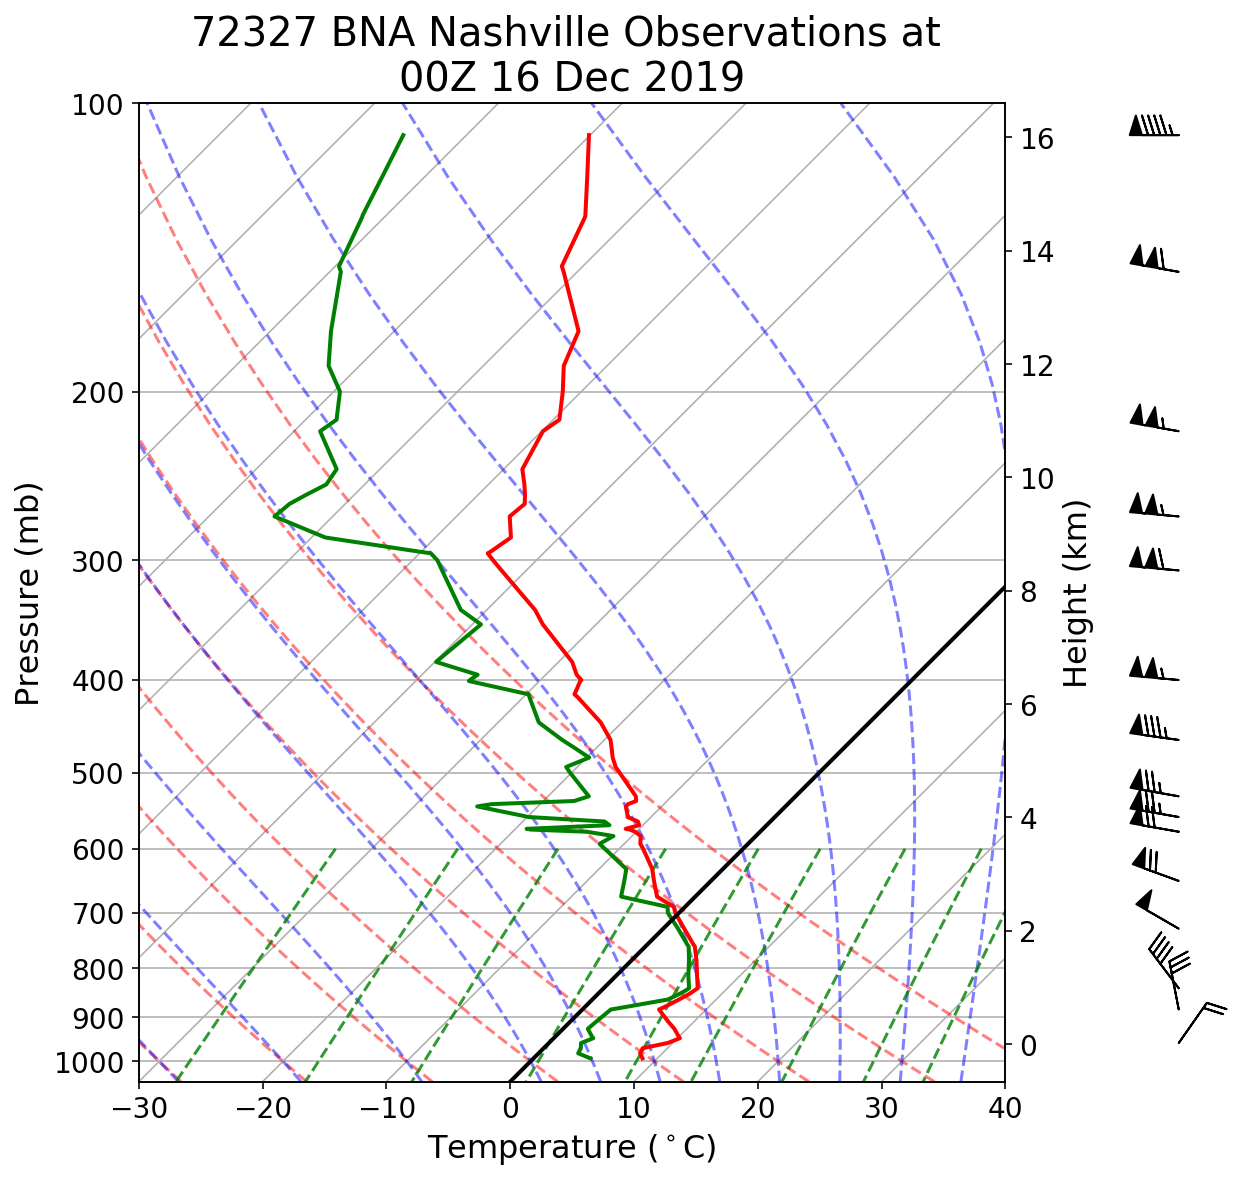

In [51]:
fig = plt.figure(figsize=(12, 9))

gs = gridspec.GridSpec(3, 3)
skew = SkewT(fig, rotation=45, subplot=gs[:, :2])

plt.title(splitted[4][:-15] + '\n' + splitted[4][-15:], fontsize = 20)

skew.plot(sounding_data['Pressure (mb)'], sounding_data['Temperature'], 'r', linewidth = 2)
skew.plot(sounding_data['Pressure (mb)'], sounding_data['Dewpoint'], 'g', linewidth = 2)

skew.plot_barbs(sounding_data['Pressure (mb)'][::-5], u[::-5], v[::-5] * -1, xloc=1.2)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

skew.ax.set_ylabel('Pressure (mb)', fontsize = 16) 
skew.ax.set_xlabel(r"Temperature ($^\circ$C)", fontsize = 16)

skew.ax.axvline(0, color='k', linewidth=2)
skew.ax.tick_params(axis='both',labelsize=14)

ax2 = skew.ax.twinx()
ax2.plot(sounding_data['Height'], sounding_data['Height']/1000, 'w')
ax2.set_ylabel("Height (km)", fontsize = 16)
ax2.tick_params(axis='both', which='major', labelsize=14)
plt.show()